# KAN
https://kindxiaoming.github.io/pykan/index.html

# indexing

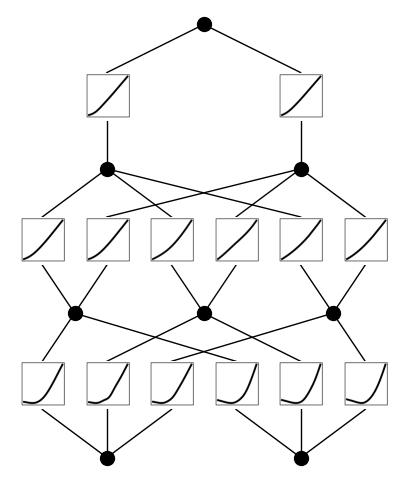

In [4]:
from kan import KAN
import torch
model = KAN(width=[2,3,2,1])
x = torch.normal(0,1,size=(100,2))
model(x)
beta = 100
model.plot(beta=beta)
# [2,3,2,1] means 2 input nodes
# 3 neurons in the first hidden layer,
# 2 neurons in the second hidden layer,
# 1 output node

## 固定函数

r2 is 0.9988070726394653


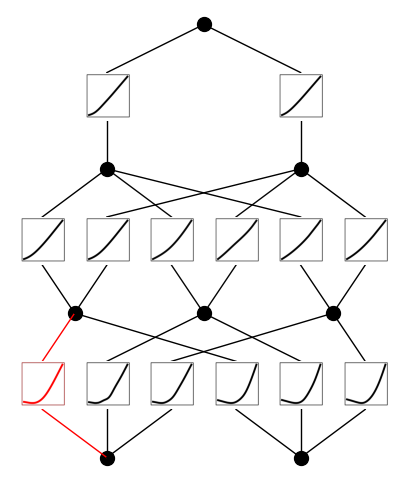

In [5]:
model.fix_symbolic(0,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,0)

r2 is 0.9991016983985901


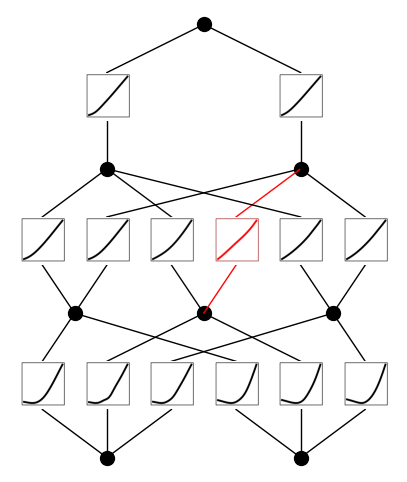

In [6]:
model.fix_symbolic(1,1,1,'sin')
model.plot(beta=beta)
model.unfix_symbolic(1,1,1)

## 移除节点

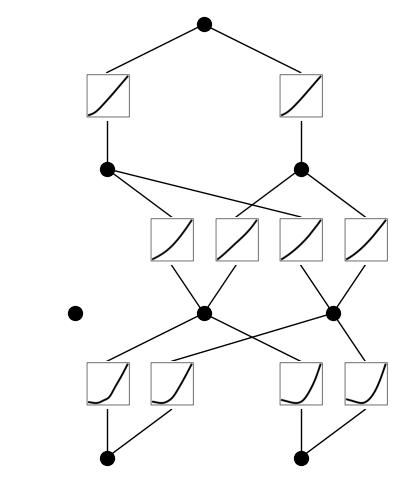

In [7]:
model.remove_node(1,0)
model.plot(beta=beta)

In [8]:
# KAN spline layers are refererred to as act_fun
# KAN symbolic layers are referred to as symbolic_fun

model = KAN(width=[2,3,2,1])

i = 0
model.act_fun[i] # => KAN Layer (Spline)
model.symbolic_fun[i] # => KAN Layer (Symbolic)

for i in range(3):
    print(model.act_fun[i].in_dim, model.act_fun[i].out_dim)
    print(model.symbolic_fun[i].in_dim, model.symbolic_fun[i].out_dim)

2 3
2 3
3 2
3 2
2 1
2 1


In [11]:
# check model parameters
model.act_fun[i].grid
model.act_fun[i].coef
model.symbolic_fun[i].funs_name
model.symbolic_fun[i].mask

Parameter containing:
tensor([[0., 0.]])

# plotting

In [12]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

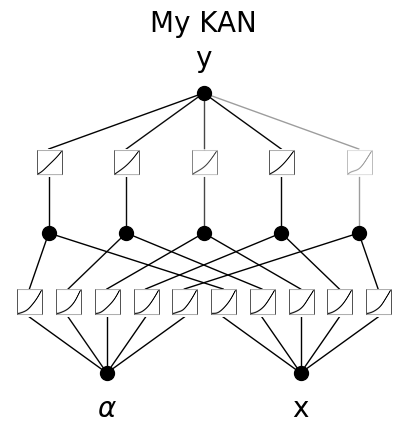

In [15]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100, in_vars=[r'$\alpha$', 'x'], out_vars=['y'], title = 'My KAN')


In [16]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 1.39e-01 | test loss: 1.48e-01 | reg: 2.66e+01 : 100%|██| 20/20 [00:08<00:00,  2.39it/s]


{'train_loss': [array(0.26820305, dtype=float32),
  array(0.16876914, dtype=float32),
  array(0.14419645, dtype=float32),
  array(0.14053226, dtype=float32),
  array(0.13719857, dtype=float32),
  array(0.13475163, dtype=float32),
  array(0.13518372, dtype=float32),
  array(0.13549761, dtype=float32),
  array(0.13549761, dtype=float32),
  array(0.13549761, dtype=float32),
  array(0.13559051, dtype=float32),
  array(0.13559075, dtype=float32),
  array(0.13629715, dtype=float32),
  array(0.13672546, dtype=float32),
  array(0.13777977, dtype=float32),
  array(0.13690151, dtype=float32),
  array(0.13541138, dtype=float32),
  array(0.12907234, dtype=float32),
  array(0.13598897, dtype=float32),
  array(0.13949789, dtype=float32)],
 'test_loss': [array(0.2768613, dtype=float32),
  array(0.1655023, dtype=float32),
  array(0.14755899, dtype=float32),
  array(0.13967228, dtype=float32),
  array(0.14553688, dtype=float32),
  array(0.14240134, dtype=float32),
  array(0.14278214, dtype=float32),
  

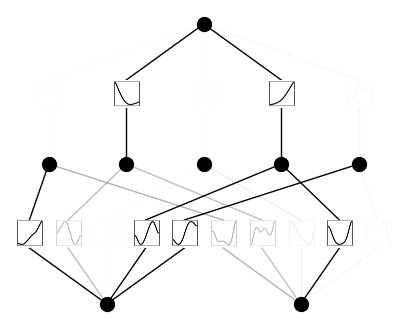

In [19]:
model.plot(beta=17)

## 删除连接

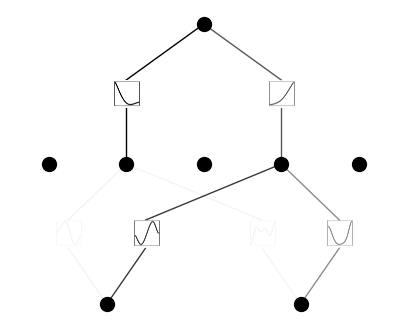

In [20]:
model.prune()
model.plot(mask=True)

## 删除神经元

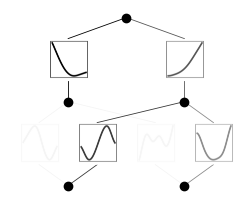

In [24]:
model2 = model.prune()
model2(dataset['train_input']) # it's important to do a forward first to collect activations
model2.plot(scale=0.3) # scale调整大小

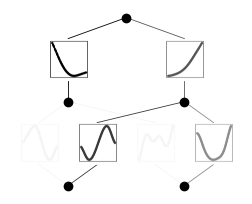

In [25]:
# If you want to see sample distribution in addition to the line, set “sample=True”
model2.plot(sample=True,scale=0.3)

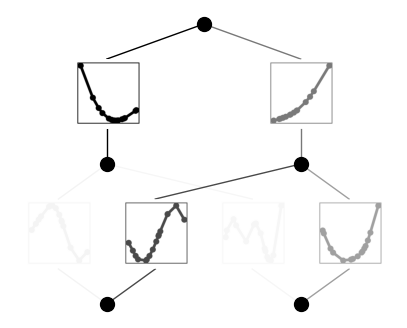

In [27]:
# The samples are more visible if we use a smaller number of samples
model2(dataset['train_input'][:16])
model2.plot(sample=True)

r2 is 0.9860796928405762


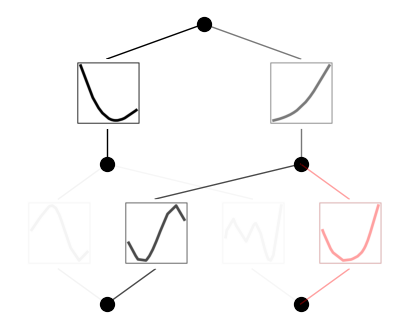

In [28]:
model2.fix_symbolic(0,1,1,'x^2')
model2.plot()

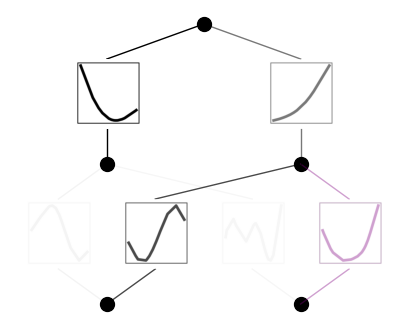

In [30]:
model2.set_mode(0,1,1,mode='ns')
model2.plot()
# model2.unset_mode(0,1,1)

# Function Fitting

In [18]:
from kan import *

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=3, k=3)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

In [13]:
model.train(dataset, opt="LBFGS", steps=20)

train loss: 9.74e-01 | test loss: 9.94e-01 | reg: 3.30e+00 : 100%|██| 20/20 [00:04<00:00,  4.58it/s]


{'train_loss': [array(1.0049652, dtype=float32),
  array(0.98070896, dtype=float32),
  array(0.97820956, dtype=float32),
  array(0.97562855, dtype=float32),
  array(0.97419286, dtype=float32),
  array(0.9747038, dtype=float32),
  array(0.9745891, dtype=float32),
  array(0.97454715, dtype=float32),
  array(0.9745306, dtype=float32),
  array(0.97447366, dtype=float32),
  array(0.9744445, dtype=float32),
  array(0.9742057, dtype=float32),
  array(0.9740485, dtype=float32),
  array(0.9739357, dtype=float32),
  array(0.97385794, dtype=float32),
  array(0.9739838, dtype=float32),
  array(0.9739687, dtype=float32),
  array(0.973918, dtype=float32),
  array(0.9738637, dtype=float32),
  array(0.973763, dtype=float32)],
 'test_loss': [array(1.0020717, dtype=float32),
  array(0.98867685, dtype=float32),
  array(0.9896413, dtype=float32),
  array(0.9878154, dtype=float32),
  array(0.9873088, dtype=float32),
  array(0.9905796, dtype=float32),
  array(0.9899786, dtype=float32),
  array(0.9906837, dt

In [7]:
# initialize a more fine-grained KAN with G=10
model2 = KAN(width=[2,1,1], grid=10, k=3)
# initialize model2 from model
model2.initialize_from_another_model(model, dataset['train_input'])

KAN(
  (biases): ModuleList(
    (0): Linear(in_features=1, out_features=1, bias=False)
    (1): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
    (1): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
    (1): Symbolic_KANLayer()
  )
)

In [8]:
model2.train(dataset, opt="LBFGS", steps=20)

train loss: 3.90e-04 | test loss: 3.86e-04 | reg: 2.95e+00 : 100%|██| 20/20 [00:04<00:00,  4.28it/s]


{'train_loss': [array(0.00525583, dtype=float32),
  array(0.00394409, dtype=float32),
  array(0.00263279, dtype=float32),
  array(0.00201903, dtype=float32),
  array(0.00128069, dtype=float32),
  array(0.00112818, dtype=float32),
  array(0.00099649, dtype=float32),
  array(0.00085867, dtype=float32),
  array(0.00082129, dtype=float32),
  array(0.00078651, dtype=float32),
  array(0.00068326, dtype=float32),
  array(0.00053571, dtype=float32),
  array(0.00047401, dtype=float32),
  array(0.00043911, dtype=float32),
  array(0.00042218, dtype=float32),
  array(0.00041216, dtype=float32),
  array(0.00040606, dtype=float32),
  array(0.00039992, dtype=float32),
  array(0.00039499, dtype=float32),
  array(0.0003904, dtype=float32)],
 'test_loss': [array(0.00450104, dtype=float32),
  array(0.00345157, dtype=float32),
  array(0.00252739, dtype=float32),
  array(0.00207561, dtype=float32),
  array(0.00132415, dtype=float32),
  array(0.00113023, dtype=float32),
  array(0.00103049, dtype=float32),
 

In [19]:
# grids = np.array([5,10,20,50,100])
grids = np.array([5,10,20])
train_losses = []
test_losses = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

train loss: 6.41e-03 | test loss: 6.55e-03 | reg: 2.78e+00 : 100%|██| 50/50 [00:12<00:00,  4.10it/s]
train loss: 2.87e-04 | test loss: 3.26e-04 | reg: 2.79e+00 : 100%|██| 50/50 [00:11<00:00,  4.42it/s]
train loss: 1.86e-05 | test loss: 2.08e-05 | reg: 2.79e+00 : 100%|██| 50/50 [00:08<00:00,  6.23it/s]


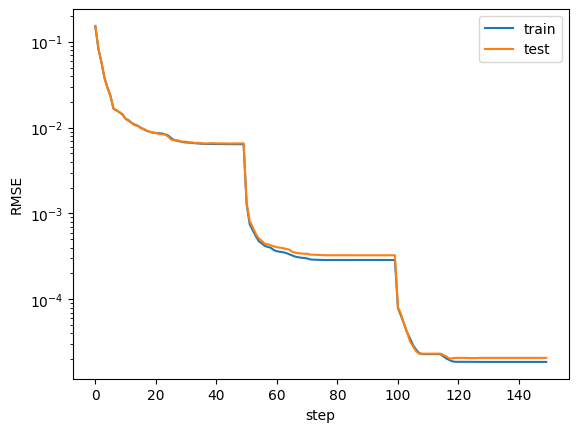

In [20]:
# Training dynamics of losses display staircase structures (loss suddenly drops after grid refinement)
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

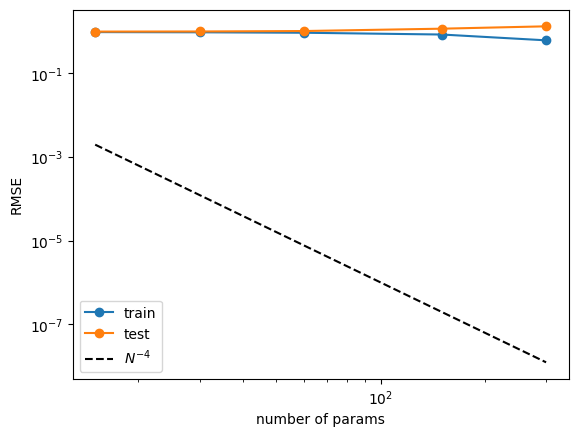

In [16]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

# Deep Formulas

In [1]:
from kan import KAN, create_dataset
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.001, lamb_entropy=2.)

e:\program\anaconda3\envs\yk_lstm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
train loss: 1.18e-02 | test loss: 1.21e-02 | reg: 6.55e+00 : 100%|██| 20/20 [00:13<00:00,  1.44it/s]


{'train_loss': [array(0.4632545, dtype=float32),
  array(0.16974722, dtype=float32),
  array(0.12344109, dtype=float32),
  array(0.0669639, dtype=float32),
  array(0.04102673, dtype=float32),
  array(0.03543229, dtype=float32),
  array(0.02662988, dtype=float32),
  array(0.02090036, dtype=float32),
  array(0.01861082, dtype=float32),
  array(0.01597972, dtype=float32),
  array(0.01543067, dtype=float32),
  array(0.01565768, dtype=float32),
  array(0.01527274, dtype=float32),
  array(0.01375246, dtype=float32),
  array(0.01212394, dtype=float32),
  array(0.01461486, dtype=float32),
  array(0.01422447, dtype=float32),
  array(0.013847, dtype=float32),
  array(0.01287234, dtype=float32),
  array(0.0117526, dtype=float32)],
 'test_loss': [array(0.4706477, dtype=float32),
  array(0.1761314, dtype=float32),
  array(0.13335146, dtype=float32),
  array(0.06930195, dtype=float32),
  array(0.04032699, dtype=float32),
  array(0.03553975, dtype=float32),
  array(0.02729786, dtype=float32),
  array

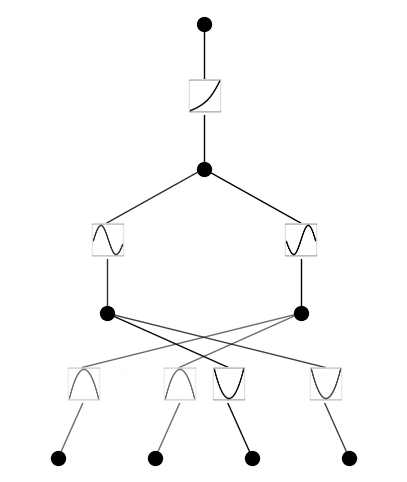

In [2]:
model.plot(beta=10)

In [3]:
remove_edge = True

if remove_edge == True:
    model.remove_edge(0,0,1)
    model.remove_edge(0,1,1)
    model.remove_edge(0,2,0)
    model.remove_edge(0,3,0)
else:
    pass

In [4]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=50, stop_grid_update_step=30);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

train loss: 4.71e-03 | test loss: 4.87e-03 | reg: 7.60e+00 : 100%|██| 50/50 [00:35<00:00,  1.42it/s]
train loss: 1.61e-03 | test loss: 1.65e-03 | reg: 7.83e+00 : 100%|██| 50/50 [00:37<00:00,  1.32it/s]
train loss: 1.76e-04 | test loss: 1.73e-04 | reg: 7.70e+00 : 100%|██| 50/50 [00:52<00:00,  1.05s/it]
train loss: 1.96e-05 | test loss: 1.32e-05 | reg: 7.70e+00 : 100%|██| 50/50 [00:44<00:00,  1.13it/s]
train loss: 5.75e-06 | test loss: 3.19e-06 | reg: 7.70e+00 : 100%|██| 50/50 [01:30<00:00,  1.81s/it]


[0.0047084493562579155, 0.0016057814937084913, 0.0001760652376106009, 1.964662988029886e-05, 5.754664925916586e-06]
[0.0048650470562279224, 0.0016491725109517574, 0.00017252349061891437, 1.3221702829468995e-05, 3.1899776331556495e-06]


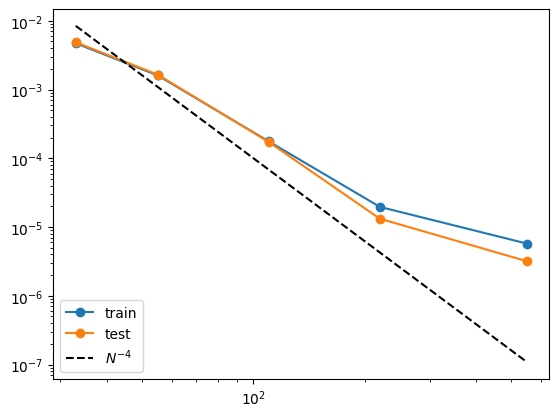

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 10000*n_params**(-4.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)

# Symbolic Regression

In [1]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

e:\program\anaconda3\envs\yk_lstm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(torch.Size([1000, 2]), torch.Size([1000, 1]))

train loss: 1.25e-01 | test loss: 1.30e-01 | reg: 2.70e+01 : 100%|██| 20/20 [00:09<00:00,  2.12it/s]


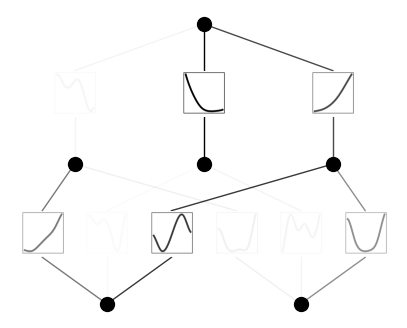

In [2]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model = model.prune()
model(dataset['train_input'])
model.plot()

In [3]:
# sin appears at the top of the suggestion list, which is good!
model.suggest_symbolic(0,0,0)

function , r2
gaussian , 0.996148943901062
x^2 , 0.9961430430412292
cosh , 0.9961344003677368
sin , 0.996131956577301
x^3 , 0.9953189492225647


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.996148943901062)

In [4]:
# x^2 appears in the suggestion list (usually not top 1), but it is fine!
model.suggest_symbolic(0,1,0)

function , r2
x^4 , 0.9659243822097778
cosh , 0.9636985063552856
x^2 , 0.9091050028800964
sin , 0.9071630835533142
gaussian , 0.9069027900695801


('x^4',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9659243822097778)

In [5]:
# let's try suggesting more by changing topk. Exp should appear in the list
# But it's very unclear why should we prefer exp over others. All of them have quite high correlation with the learned spline.
model.suggest_symbolic(1,0,0,topk=15)

function , r2
x^3 , 0.9067829251289368
tan , 0.7859191298484802
arctan , 0.7747647166252136
1/x , 0.7682410478591919
1/sqrt(x) , 0.767699658870697
1/x^2 , 0.7663658261299133
1/x^3 , 0.7644850611686707
1/x^4 , 0.7630579471588135
log , 0.7609970569610596
exp , 0.7552587985992432
cosh , 0.7552587389945984
tanh , 0.7543567419052124
sigmoid , 0.7538147568702698
arctanh , 0.7536383867263794
gaussian , 0.747546374797821


('x^3',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9067829251289368)

In [6]:
model.train(dataset, opt="LBFGS", steps=20)

train loss: 7.00e-03 | test loss: 6.91e-03 | reg: 7.88e+00 : 100%|██| 20/20 [00:06<00:00,  3.02it/s]


{'train_loss': [array(0.06285654, dtype=float32),
  array(0.04246197, dtype=float32),
  array(0.02886211, dtype=float32),
  array(0.02298562, dtype=float32),
  array(0.02112252, dtype=float32),
  array(0.01904737, dtype=float32),
  array(0.0164315, dtype=float32),
  array(0.01425007, dtype=float32),
  array(0.01338758, dtype=float32),
  array(0.01274578, dtype=float32),
  array(0.01141754, dtype=float32),
  array(0.01010081, dtype=float32),
  array(0.00961601, dtype=float32),
  array(0.00914947, dtype=float32),
  array(0.00882899, dtype=float32),
  array(0.00854236, dtype=float32),
  array(0.00806163, dtype=float32),
  array(0.00759531, dtype=float32),
  array(0.00733898, dtype=float32),
  array(0.00699891, dtype=float32)],
 'test_loss': [array(0.067555, dtype=float32),
  array(0.04320643, dtype=float32),
  array(0.02886363, dtype=float32),
  array(0.02285589, dtype=float32),
  array(0.02017335, dtype=float32),
  array(0.01965756, dtype=float32),
  array(0.01668611, dtype=float32),
  a

In [7]:
model.auto_symbolic()

# if the user wants to constrain the symbolic space, they can pass in their symbolic libarary
# lib = ['sin', 'x^2', 'exp']
# model.auto_symbolic(lib=lib)

fixing (0,0,0) with cosh, r2=0.9977264404296875
fixing (0,0,1) with sin, r2=0.9995924830436707
fixing (0,0,2) with sin, r2=0.9990100860595703
fixing (0,1,0) with cosh, r2=0.9813847541809082
fixing (0,1,1) with x^4, r2=0.9245129823684692
fixing (0,1,2) with gaussian, r2=0.9969290494918823
fixing (1,0,0) with sin, r2=0.9873413443565369
fixing (1,1,0) with 1/x^4, r2=0.9993158578872681
fixing (1,2,0) with sigmoid, r2=0.9999945759773254


In [8]:
# obtaining symbolic formula
formula, variables = model.symbolic_formula()
formula[0]

25.86*sigmoid(-1.09*sin(3.17*x_1 - 9.4) + 0.29 - 3.55*exp(-0.32*x_2**2)) + 0.2*sin(16.09*cosh(0.6*x_1 + 0.32) + 0.18*cosh(2.17*x_2 + 0.04) - 14.65) - 0.29 + 0.2/(0.24*x_2**4 + 0.18*sin(3.14*x_1 - 0.e-2) - 1)**4

In [9]:
# if you want to rename your variables, you could use the "var" argument
formula, variables = model.symbolic_formula(var=['\\alpha','y'])
formula[0]

25.86*sigmoid(-1.09*sin(3.17*\alpha - 9.4) + 0.29 - 3.55*exp(-0.32*y**2)) + 0.2*sin(16.09*cosh(0.6*\alpha + 0.32) + 0.18*cosh(2.17*y + 0.04) - 14.65) - 0.29 + 0.2/(0.24*y**4 + 0.18*sin(3.14*\alpha - 0.e-2) - 1)**4

In [10]:
# one can even postprocess the formula (e.g., taking derivatives)
from sympy import *
diff(formula[0], variables[0])

-89.36*cos(3.17*\alpha - 9.4)*Subs(Derivative(sigmoid(_xi_1), _xi_1), _xi_1, -1.09*sin(3.17*\alpha - 9.4) + 0.29 - 3.55*exp(-0.32*y**2)) + 1.929*cos(16.09*cosh(0.6*\alpha + 0.32) + 0.18*cosh(2.17*y + 0.04) - 14.65)*sinh(0.6*\alpha + 0.32) - 0.452*cos(3.14*\alpha - 0.e-2)/(0.24*y**4 + 0.18*sin(3.14*\alpha - 0.e-2) - 1)**5

In [2]:
import sympy as sp

# 定义符号变量
theta1, theta2, l1, l2 = sp.symbols('theta1 theta2 l1 l2')

# 定义末端执行器的位置函数
x = l1 * sp.cos(theta1) + l2 * sp.cos(theta1 + theta2)
y = l1 * sp.sin(theta1) + l2 * sp.sin(theta1 + theta2)

# 定义位置向量
position = sp.Matrix([x, y])

# 定义关节变量向量
variables = sp.Matrix([theta1, theta2])

# 计算雅可比矩阵
jacobian_matrix = position.jacobian(variables)

# 显示雅可比矩阵
jacobian_matrix


Matrix([
[-l1*sin(theta1) - l2*sin(theta1 + theta2), -l2*sin(theta1 + theta2)],
[ l1*cos(theta1) + l2*cos(theta1 + theta2),  l2*cos(theta1 + theta2)]])